In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solveTriangleSlae(a, b, c, d):
    n = len(b)
    p, q = np.zeros(n), np.zeros(n)
    c = c + [0]
    p[0] = c[0] / b[0]
    q[0] = d[0] / b[0]
    for i in range(1, n):
        p[i] = c[i] / (b[i] - (a[i - 1] * p[i - 1]))
        q[i] = (d[i] - (a[i - 1] * q[i - 1])) / (b[i] - (a[i - 1]*p[i - 1]))

    x = np.zeros(n)
    m = n - 1

    x[m] = q[-1]
    for i in range(n - 2, -1, -1):
        x[i] = q[i] - (x[i + 1] * p[i])
    return x


In [3]:
z = 10 
B = 50 
L = 500 
p0 = 100 * 1e5 
p_inj = 150 * 10**5
p_prod = 50 * 10**5

k = 10**(-14)
mu = 10**(-3)
phi = 0.2 

rho0 = 1000
cf = 1e-4 / 10**5
p_o = 120 * 10**5
rho = lambda p: rho0*(1 + cf*(p - p_o))
LN = 100
time = 10 * 24 * 60 * 60

In [4]:
def rho_next(n, i):
    if p[n][i] >= p[n][i + 1]:
        return rho(p[n][i])
    else:
        return rho(p[n][i + 1])

def rho_prev(n, i):
    if p[n][i-1] >= p[n][i]:
        return rho(p[n][i - 1])
    else:
        return rho(p[n][i])

In [5]:
x = np.linspace(0, L, LN)
h = np.diff(x)[0]

N = 100
t = np.linspace(0, time , N + 1)
tau = np.diff(t)[0]

p = np.zeros([N+1, LN])
p[0, :] = p0
p[0][0] = p_inj
p[0][-1] = p_prod

In [6]:
for n in range(N):
    c = [k * rho_prev(n, i) / (mu * h**2) for i in range(1, LN - 1)] + [0]
    b = [0] + [k * rho_next(n, i) / (mu * h**2) for i in range(1, LN - 1)]
    a = [1] + [-c[i - 1] - b[i] - (phi * cf * rho0 / tau) for i in range(1, LN - 1)] + [1]
    d = [p_inj] + [-phi * cf * rho0 * p[n][i] / tau for i in range(1, LN - 1)] + [p_prod]
    p[n + 1, :] = solveTriangleSlae(c, a, b, d) 

In [7]:
def Graph():
    d_values = [0.1, 0.25, 0.5, 1, 1.5, 2, 3, 10]
    for d in d_values:
        plt.figure(figsize = (8,5), dpi=300)
        plt.plot(x, p[int(d*10)], label = f'День {d}')
        plt.legend()
        plt.grid()
        plt.show()


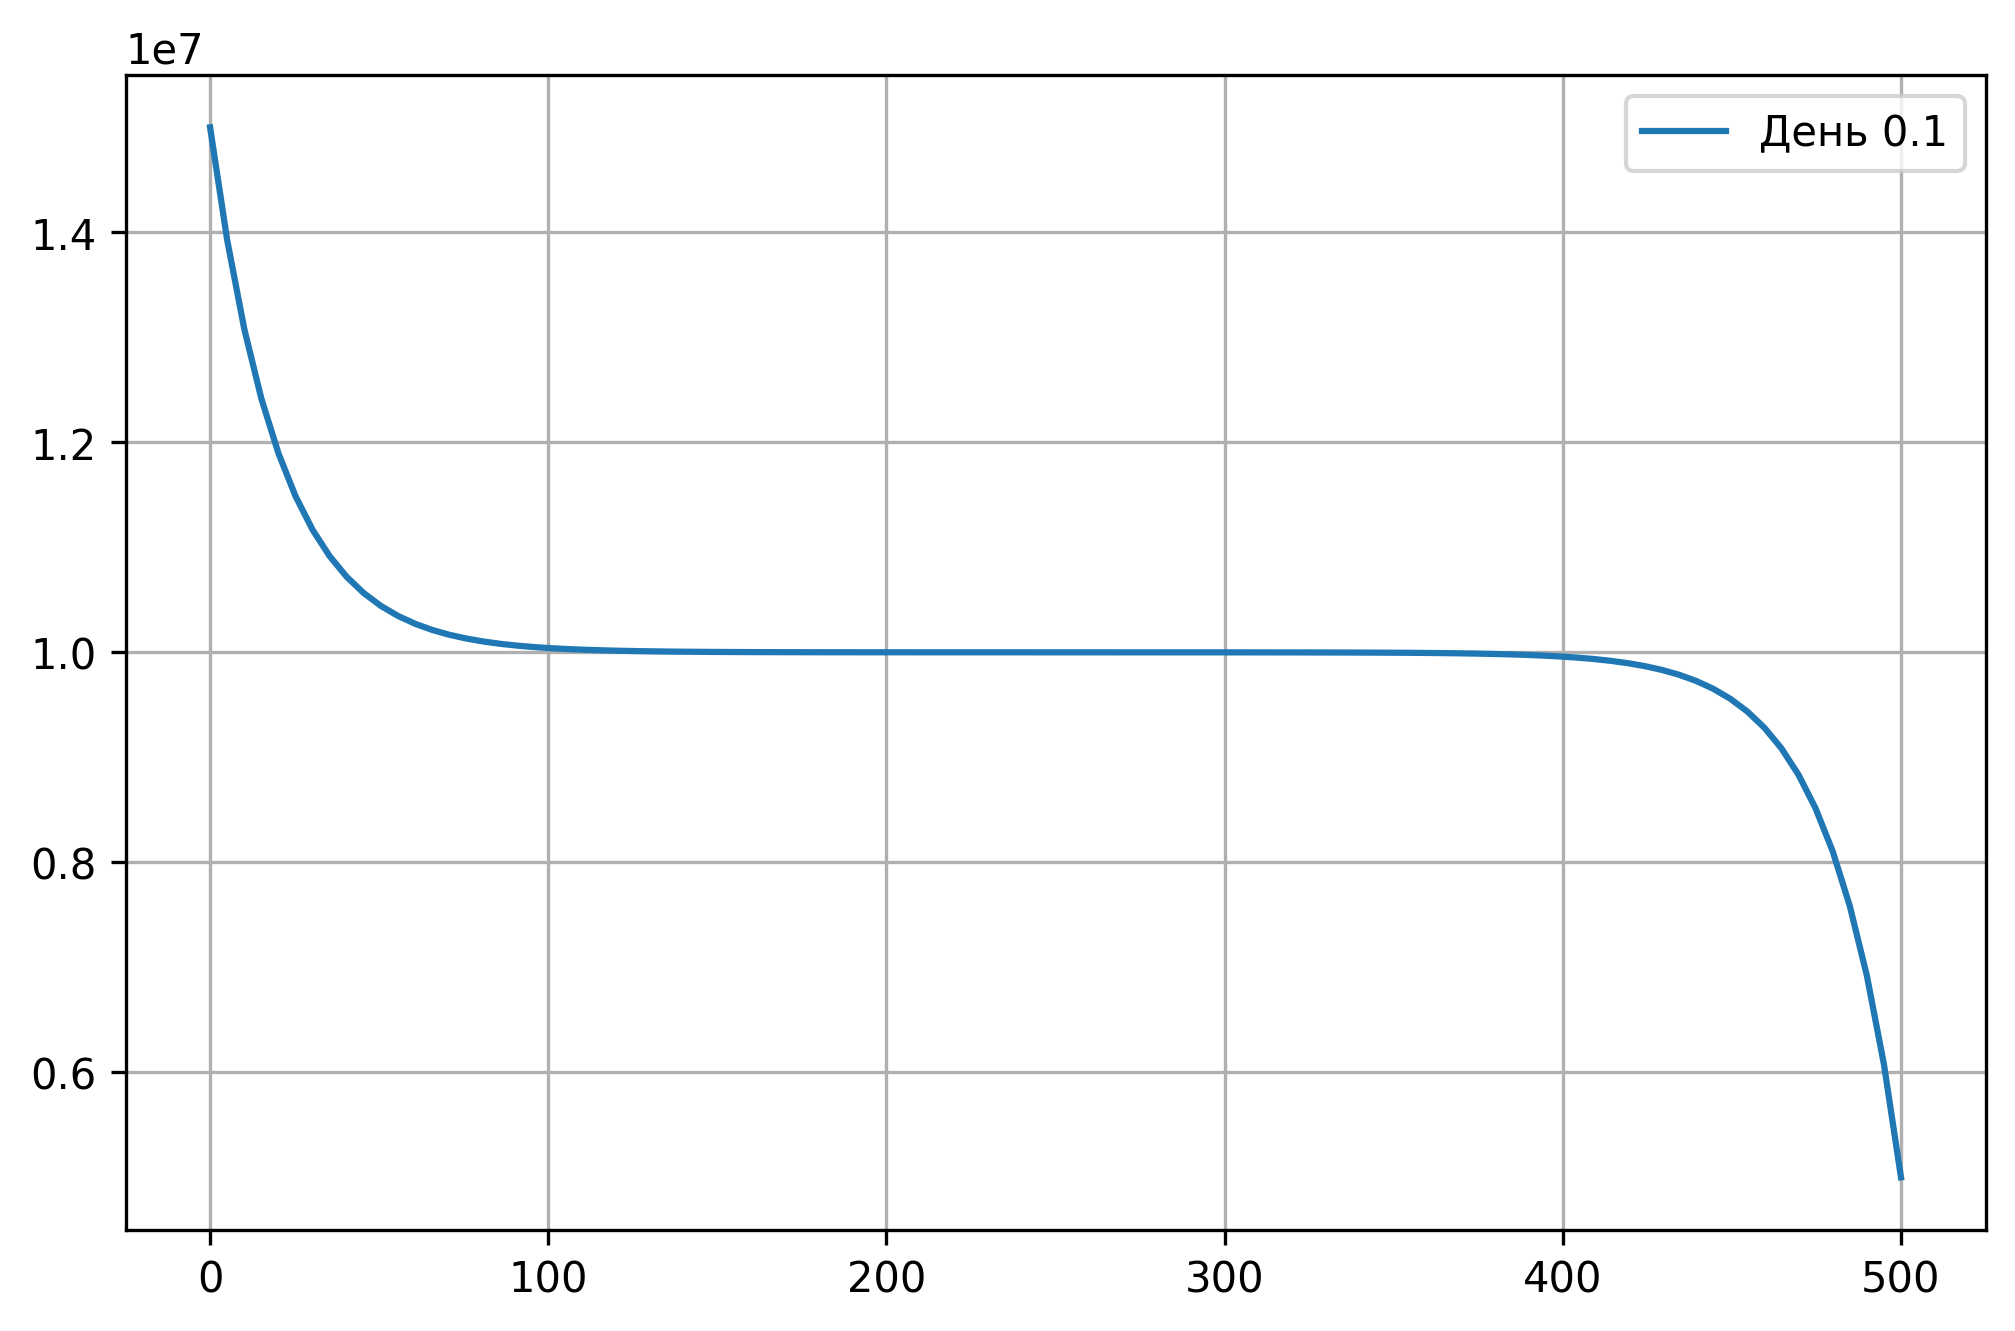

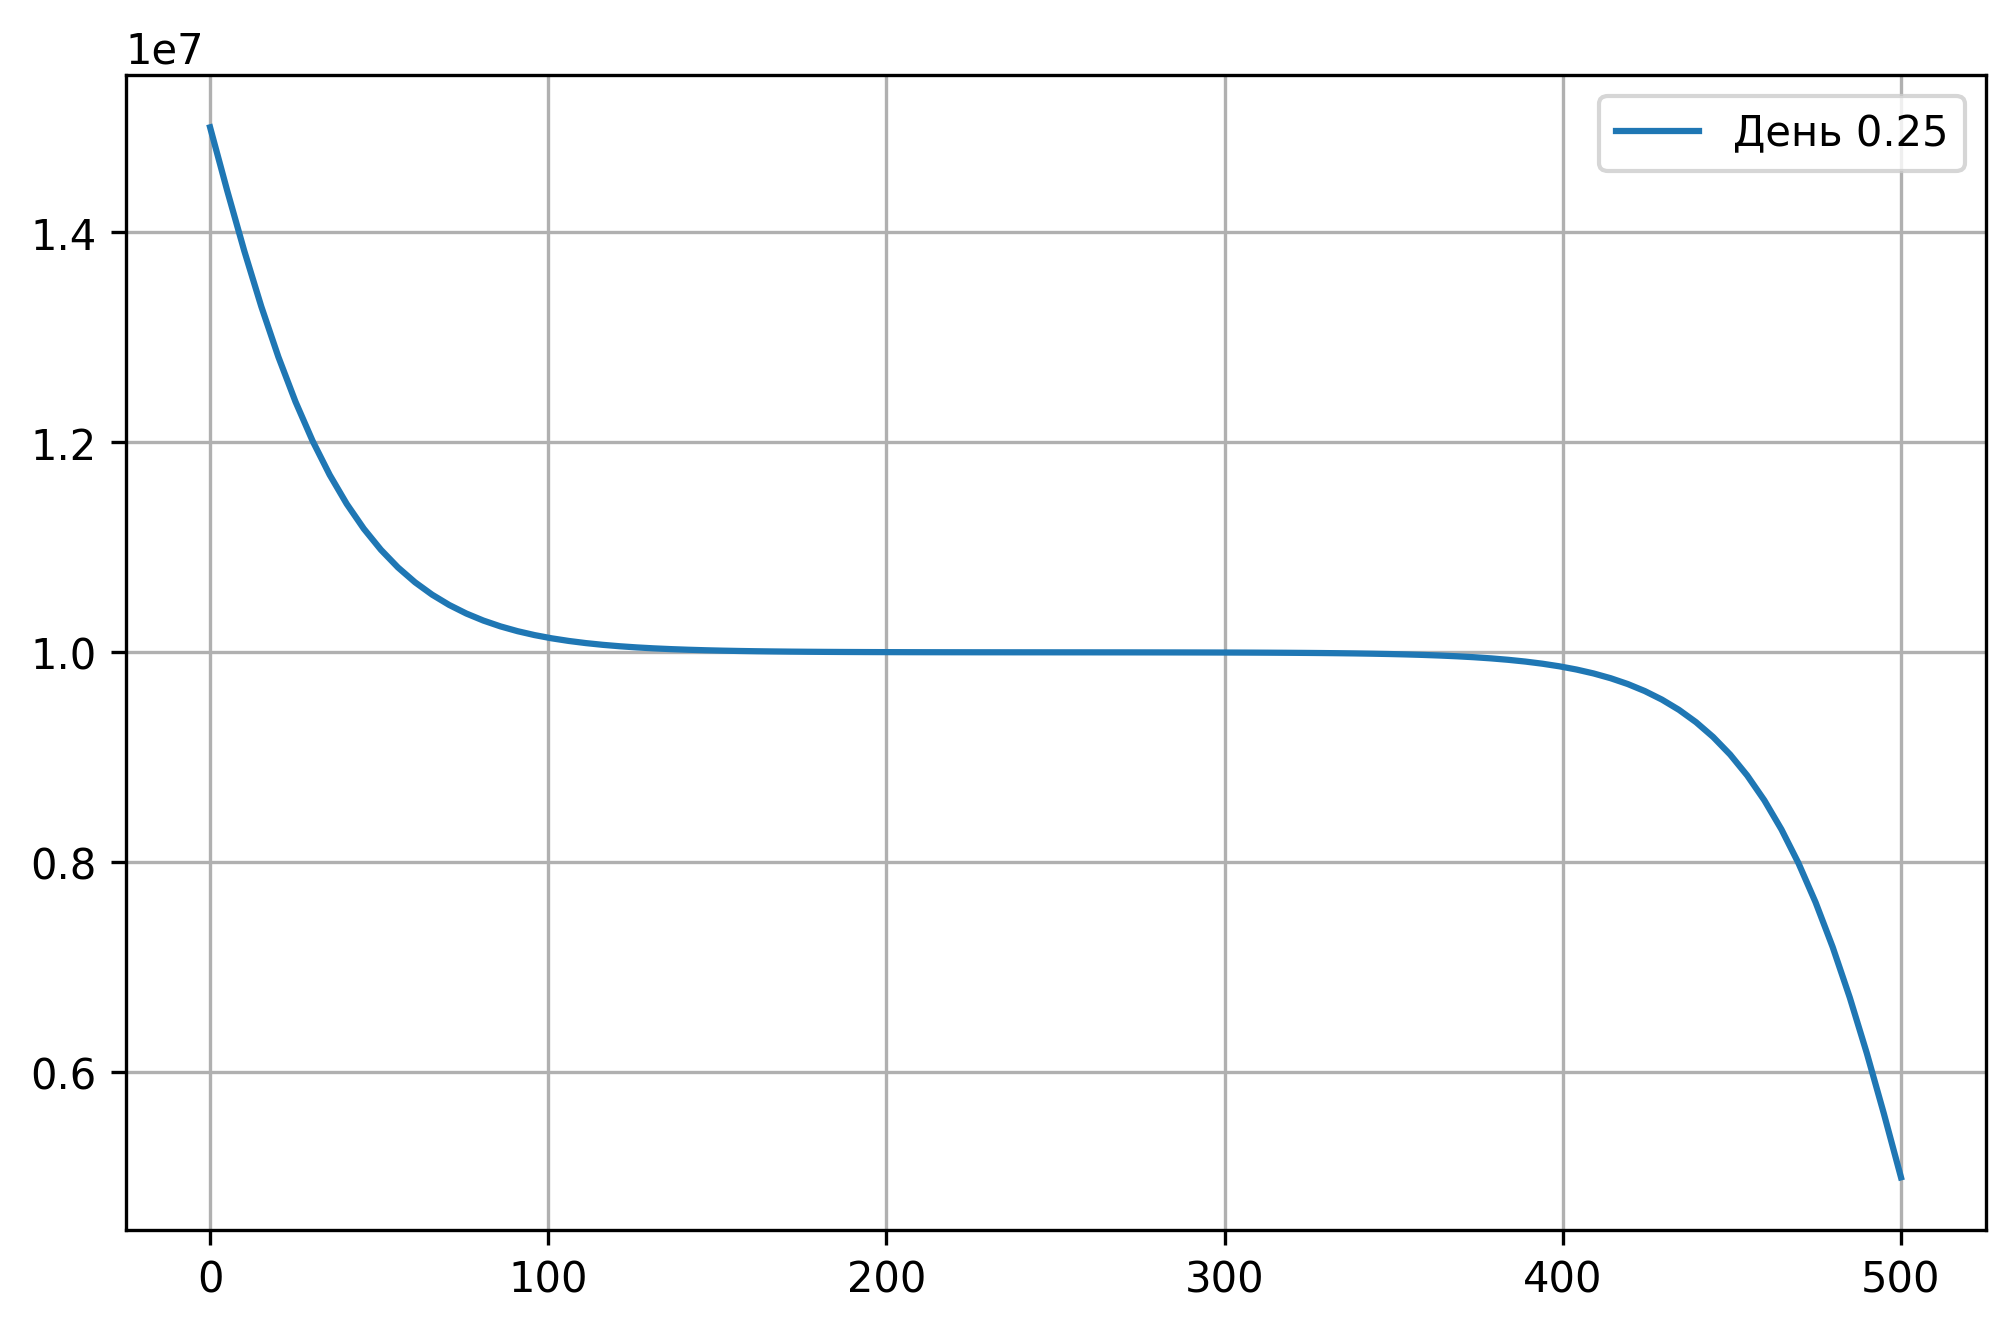

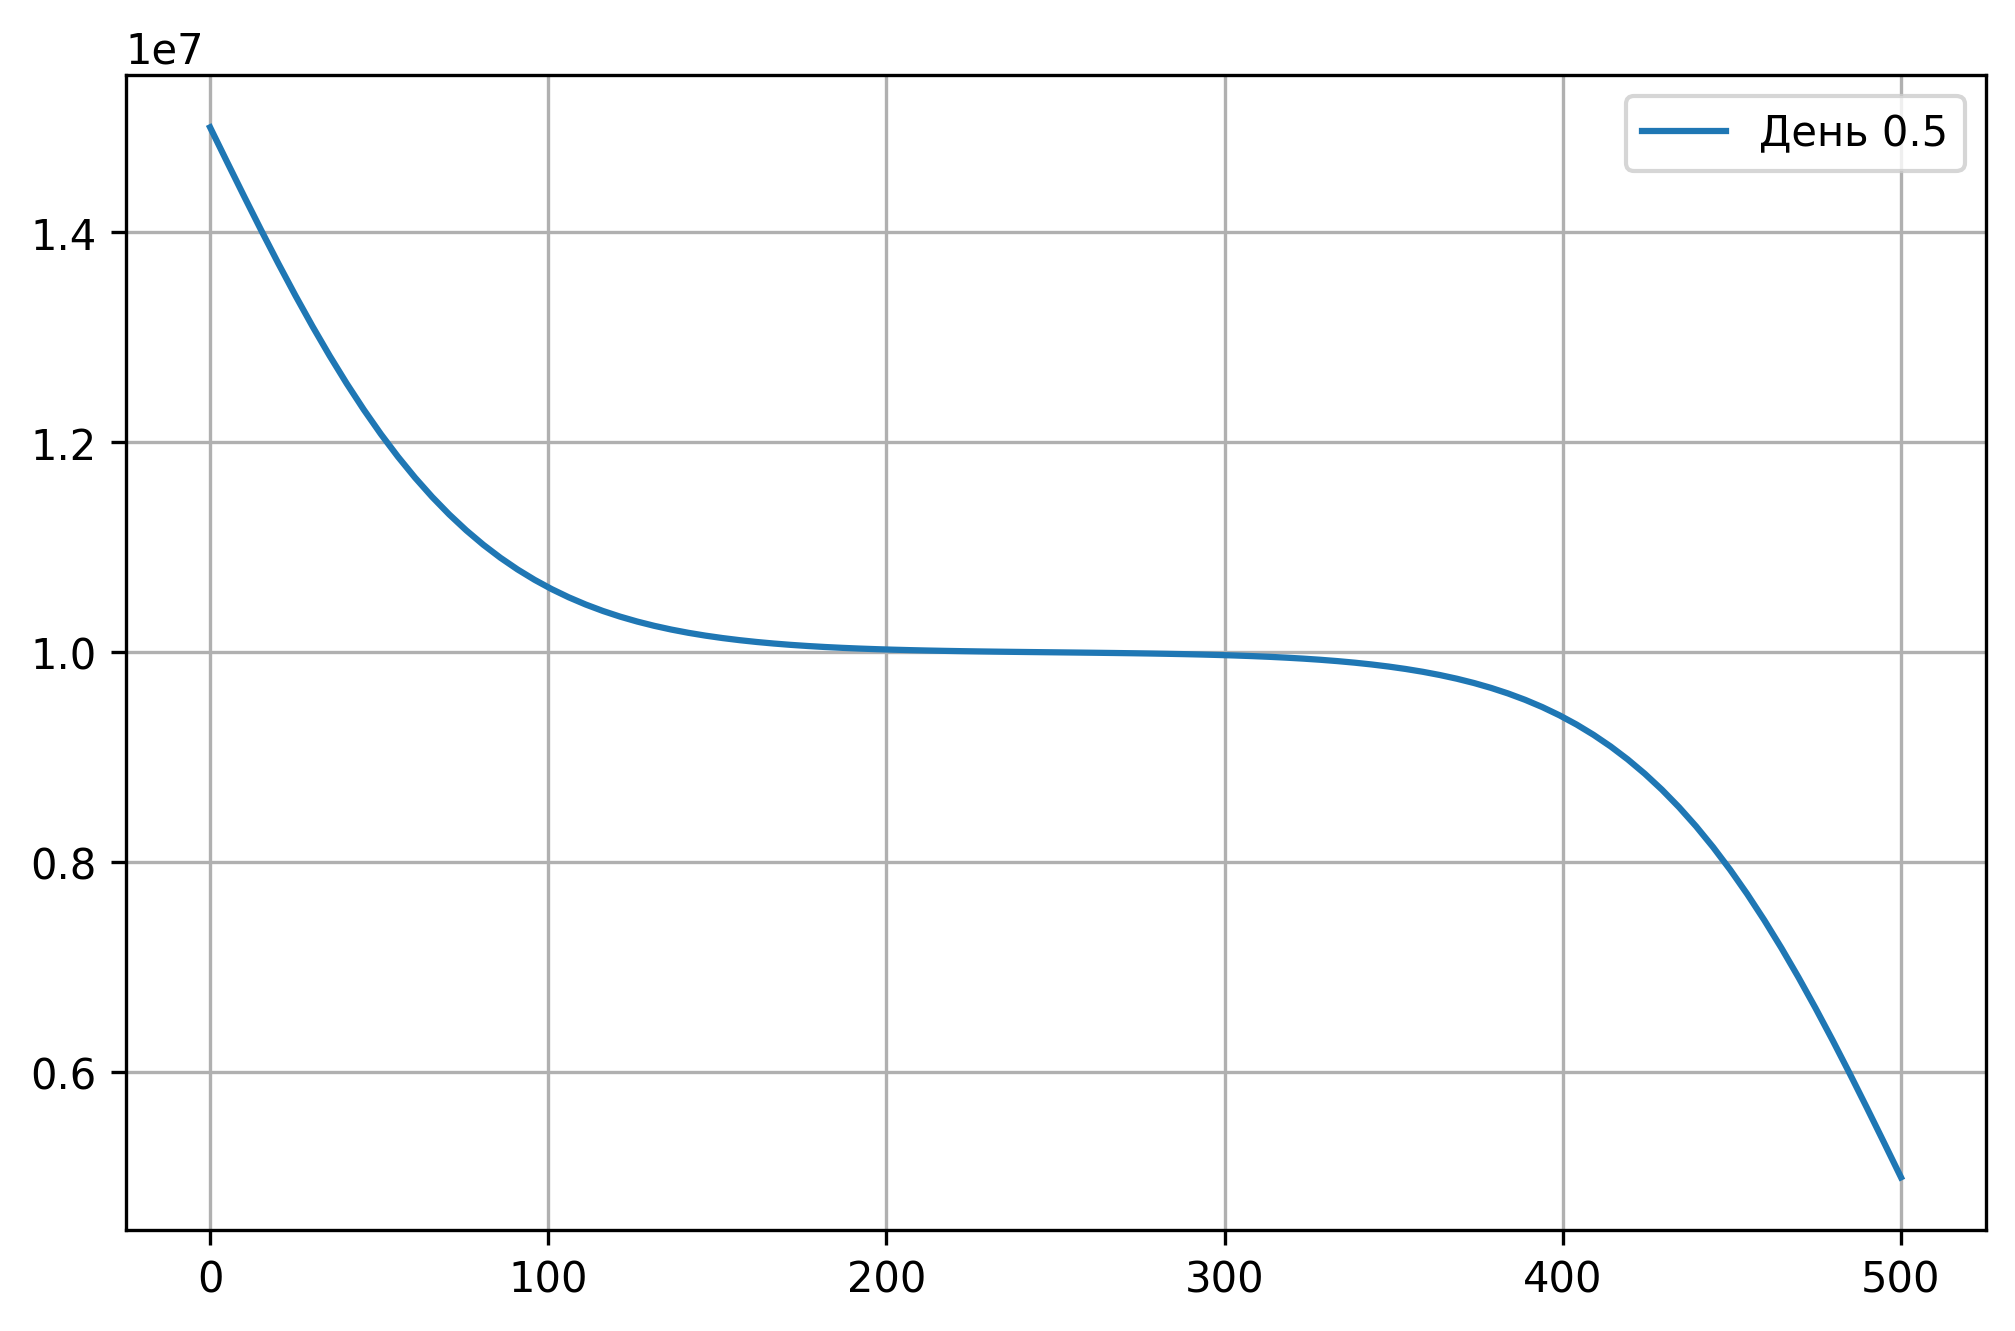

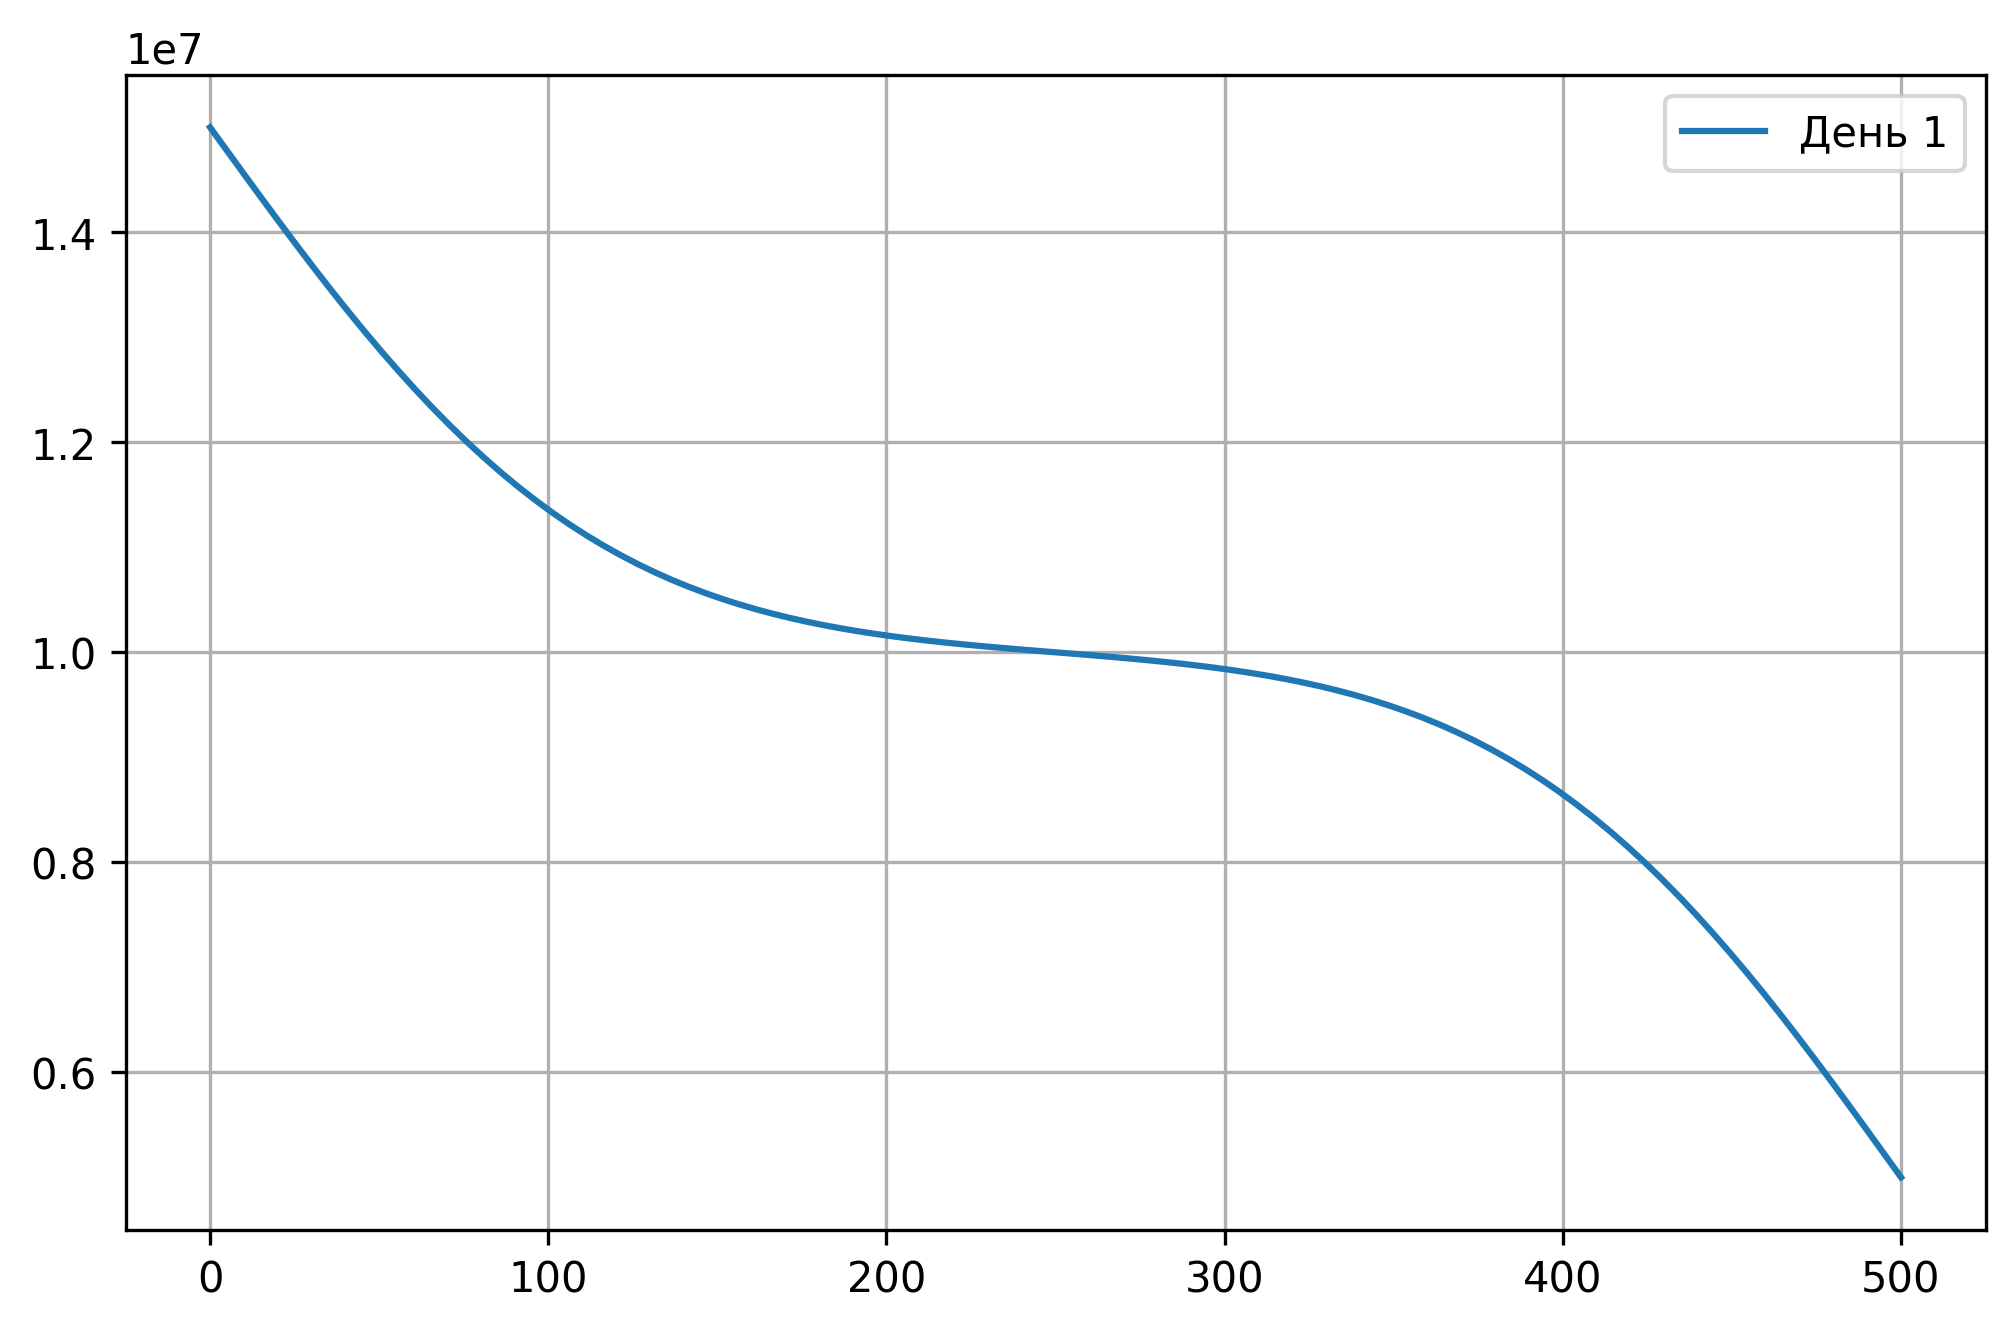

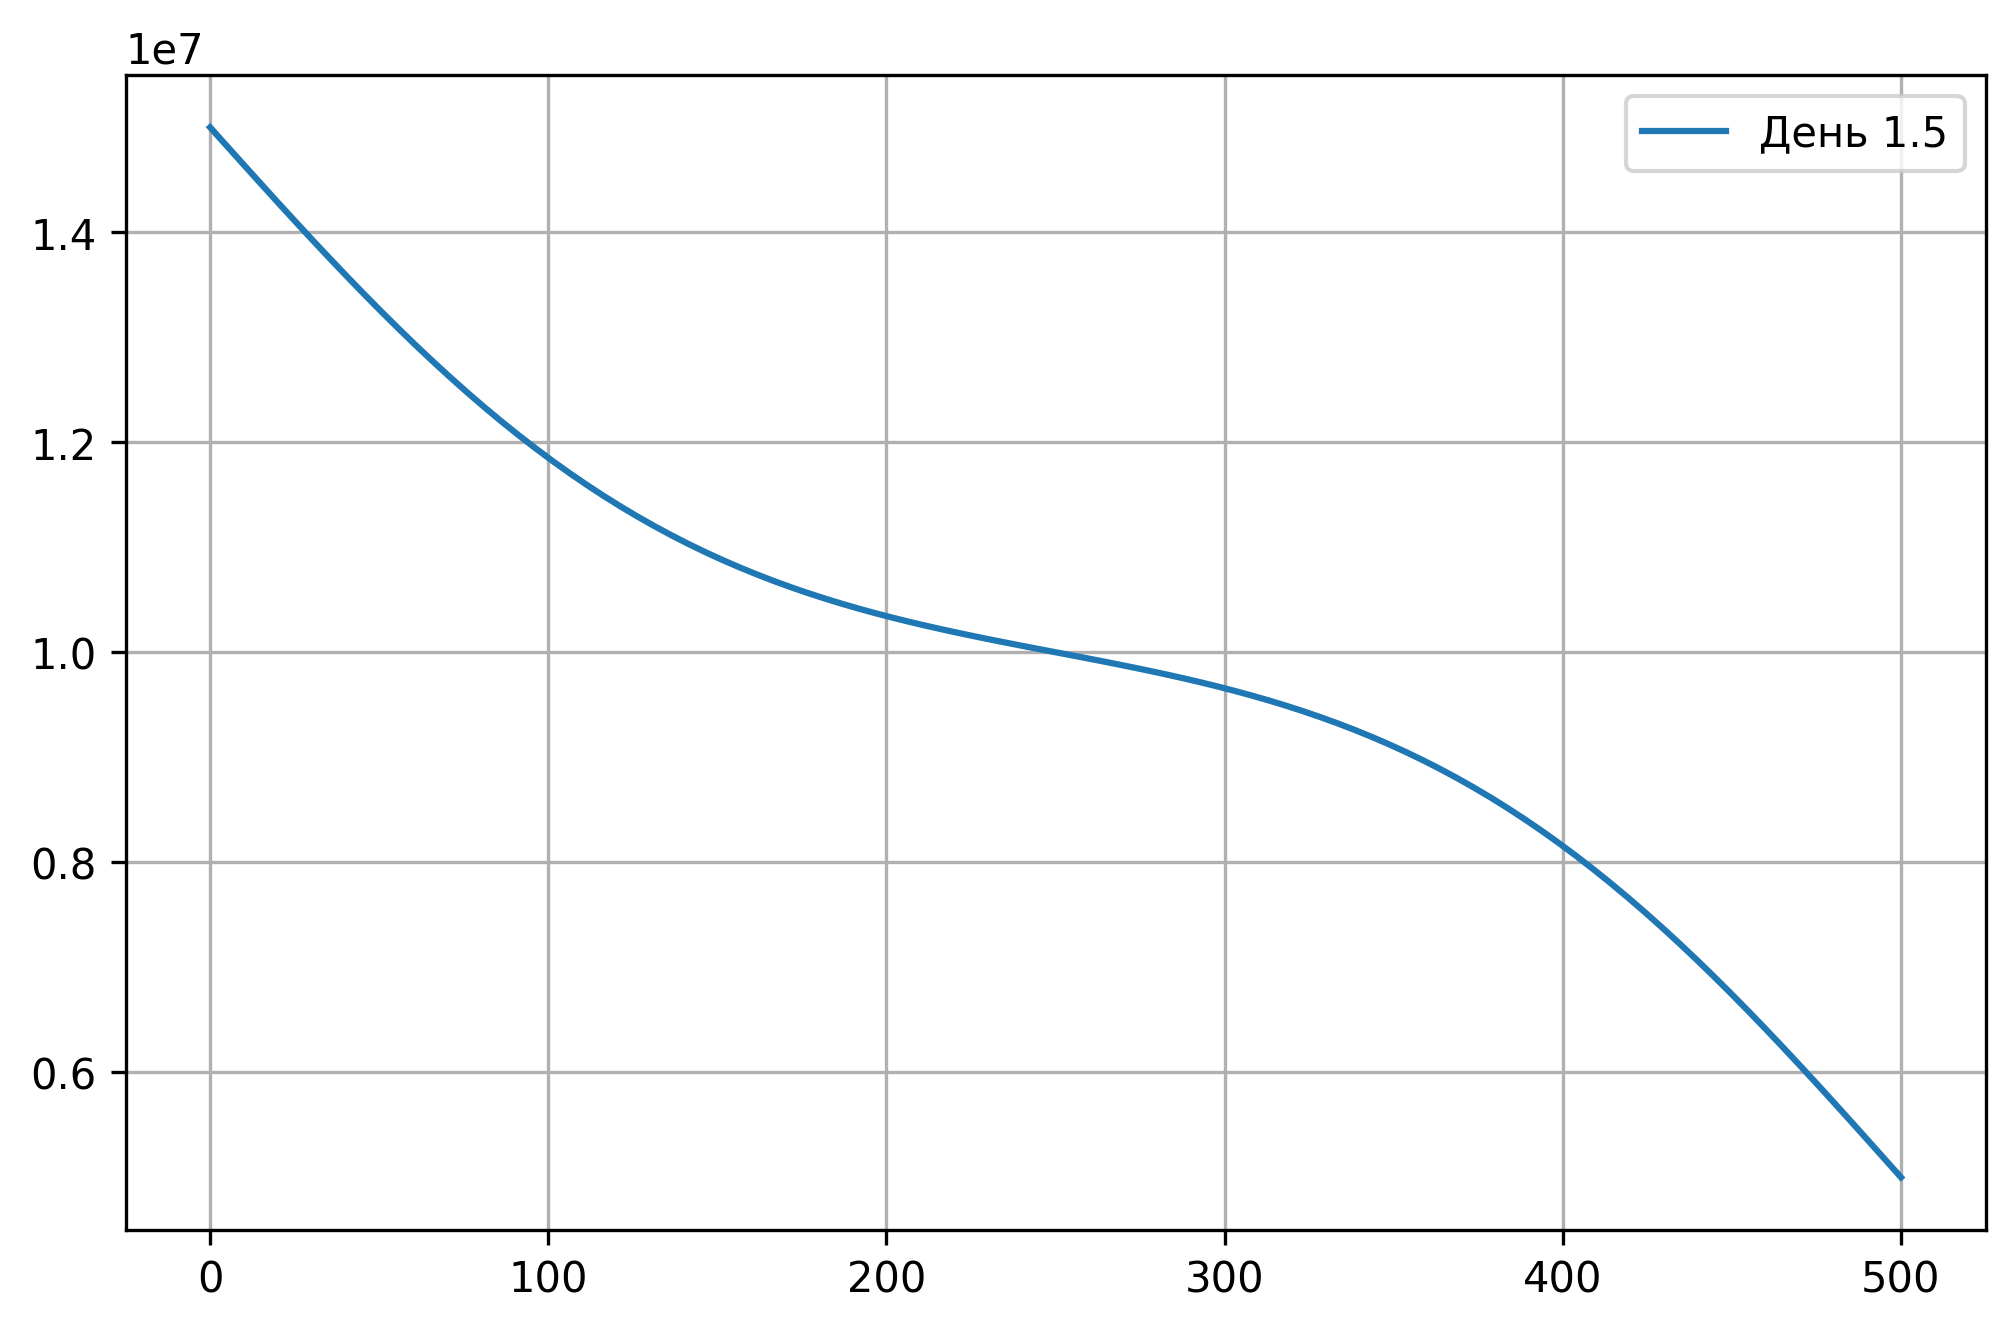

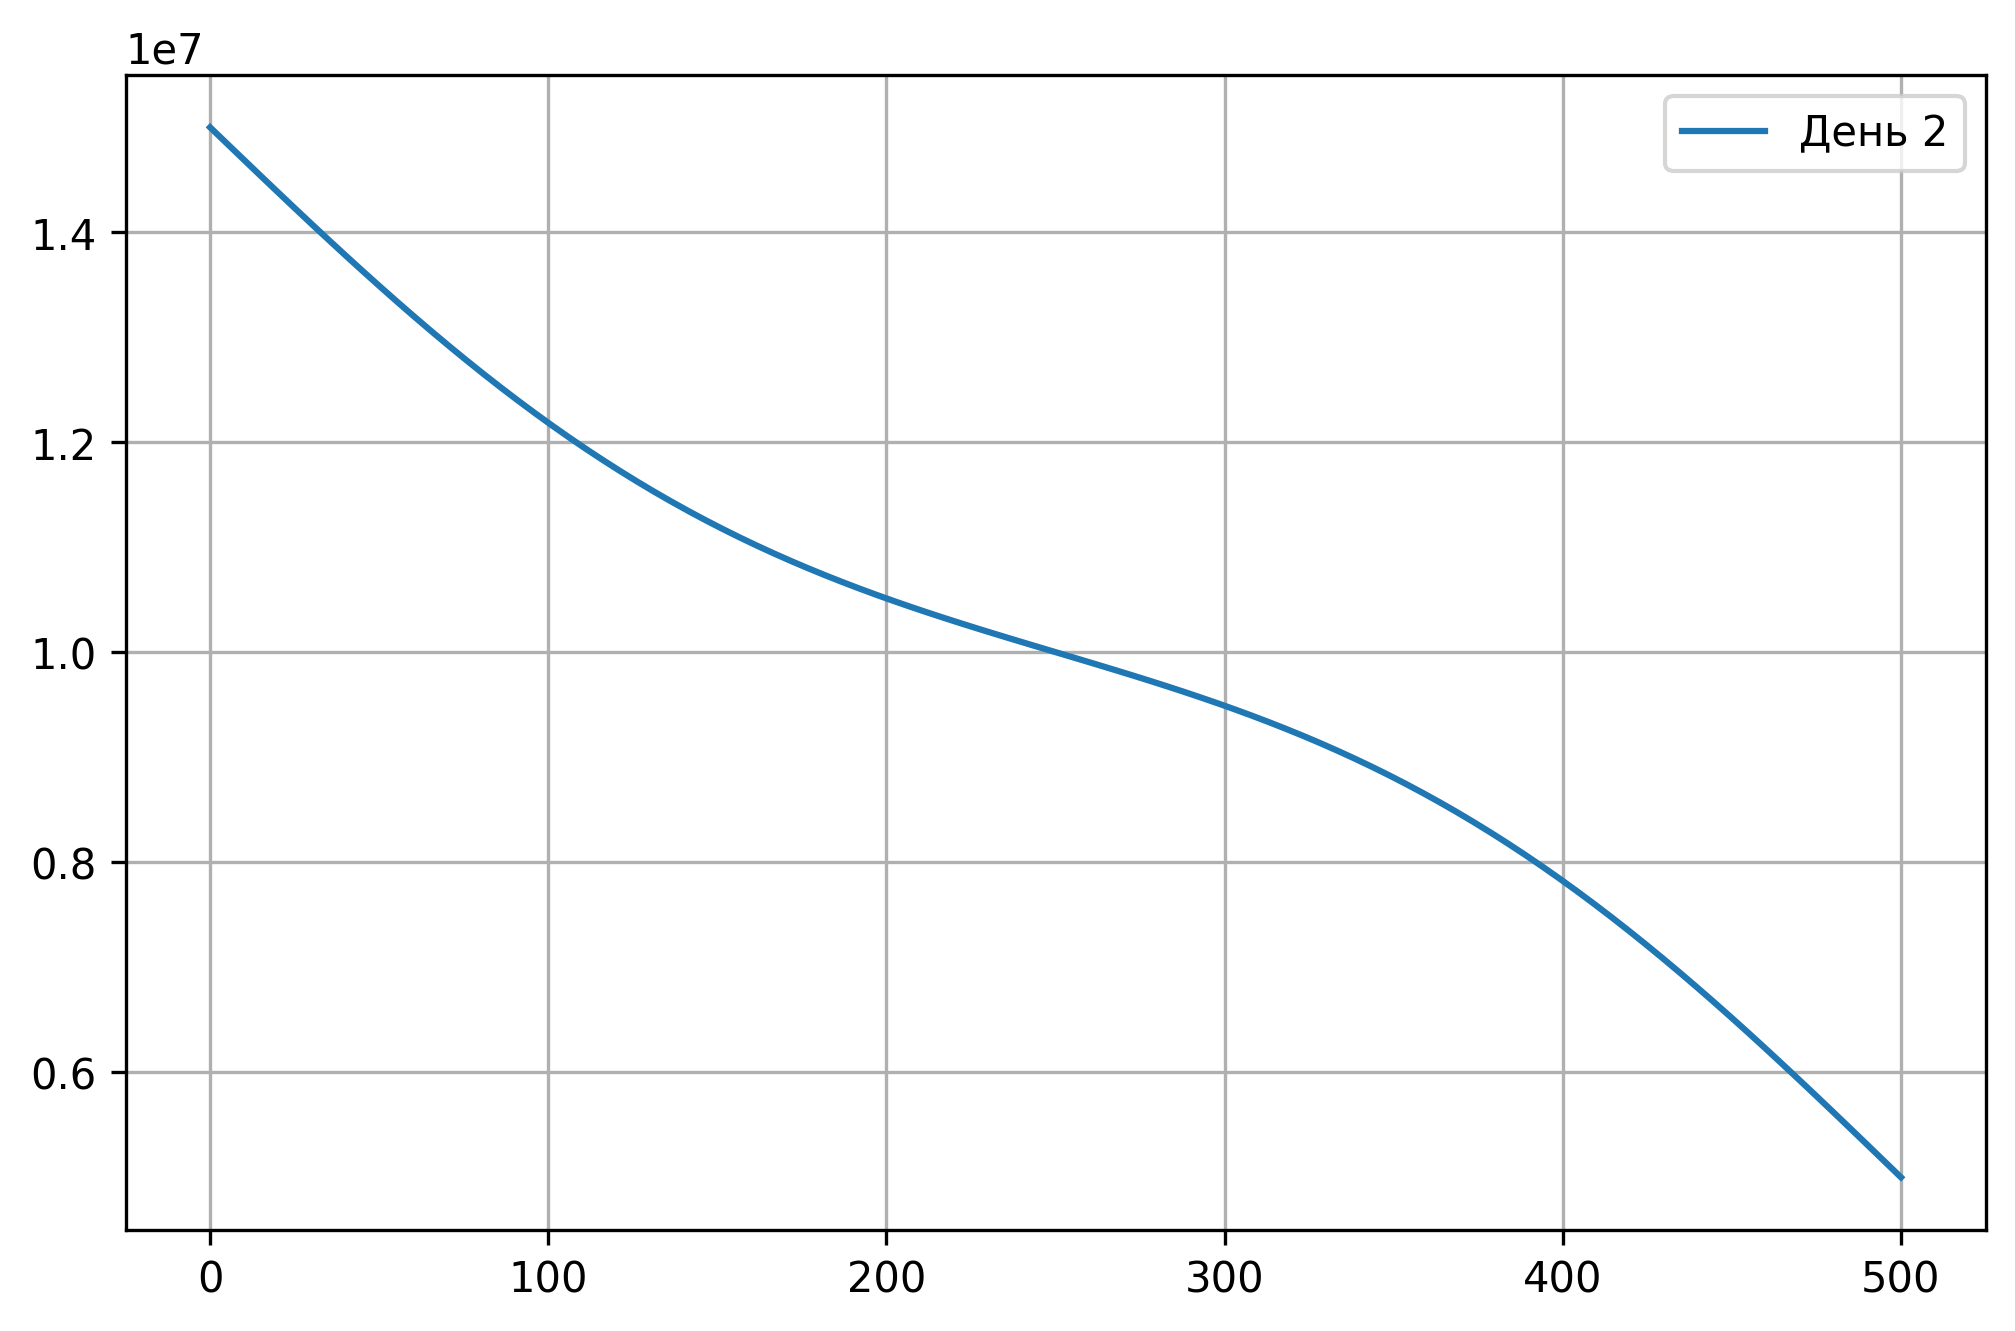

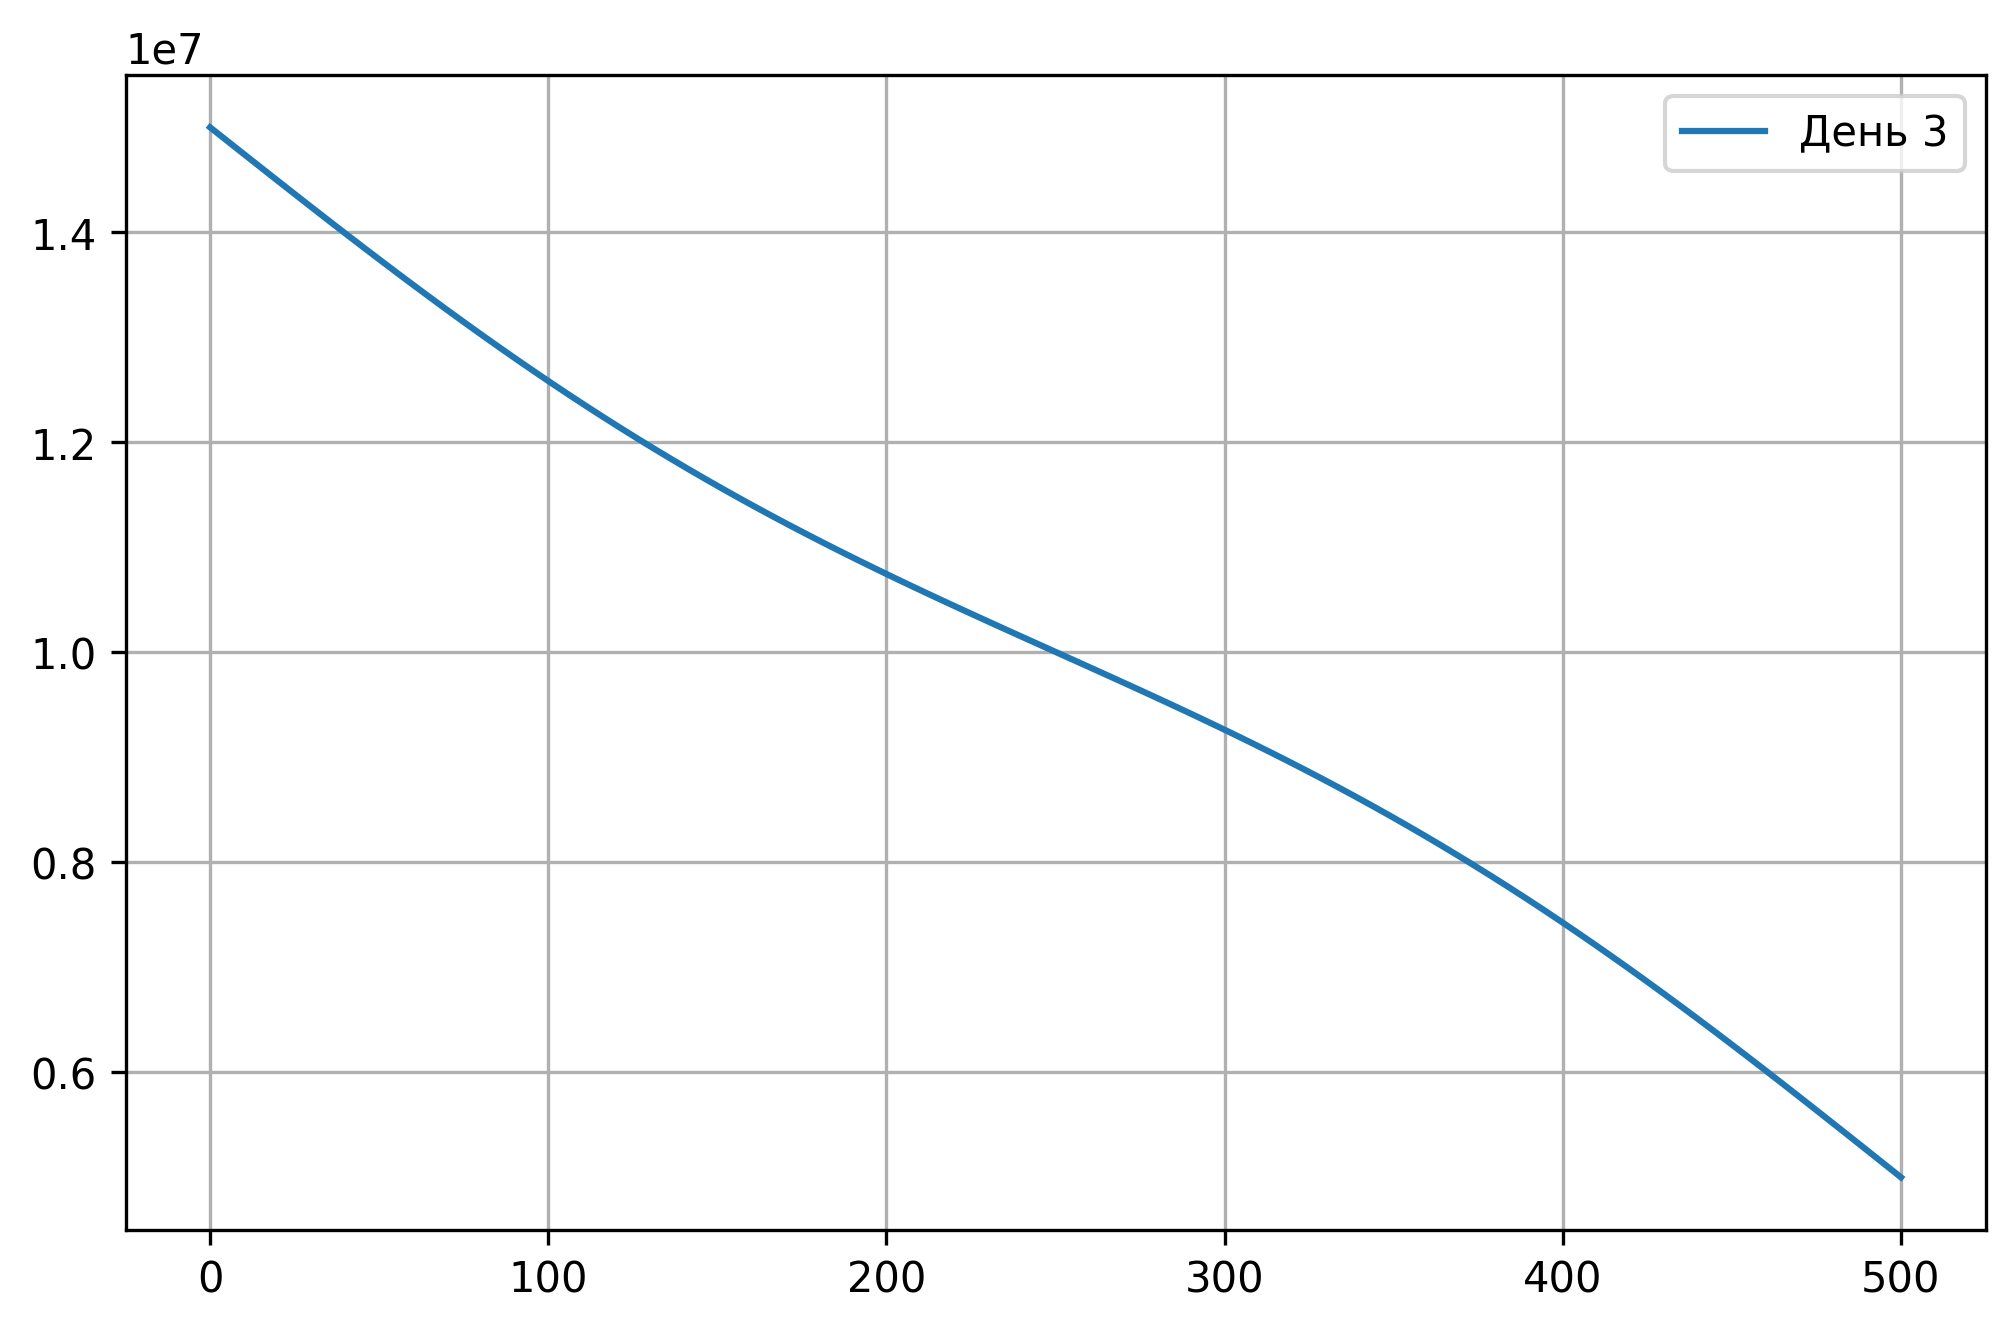

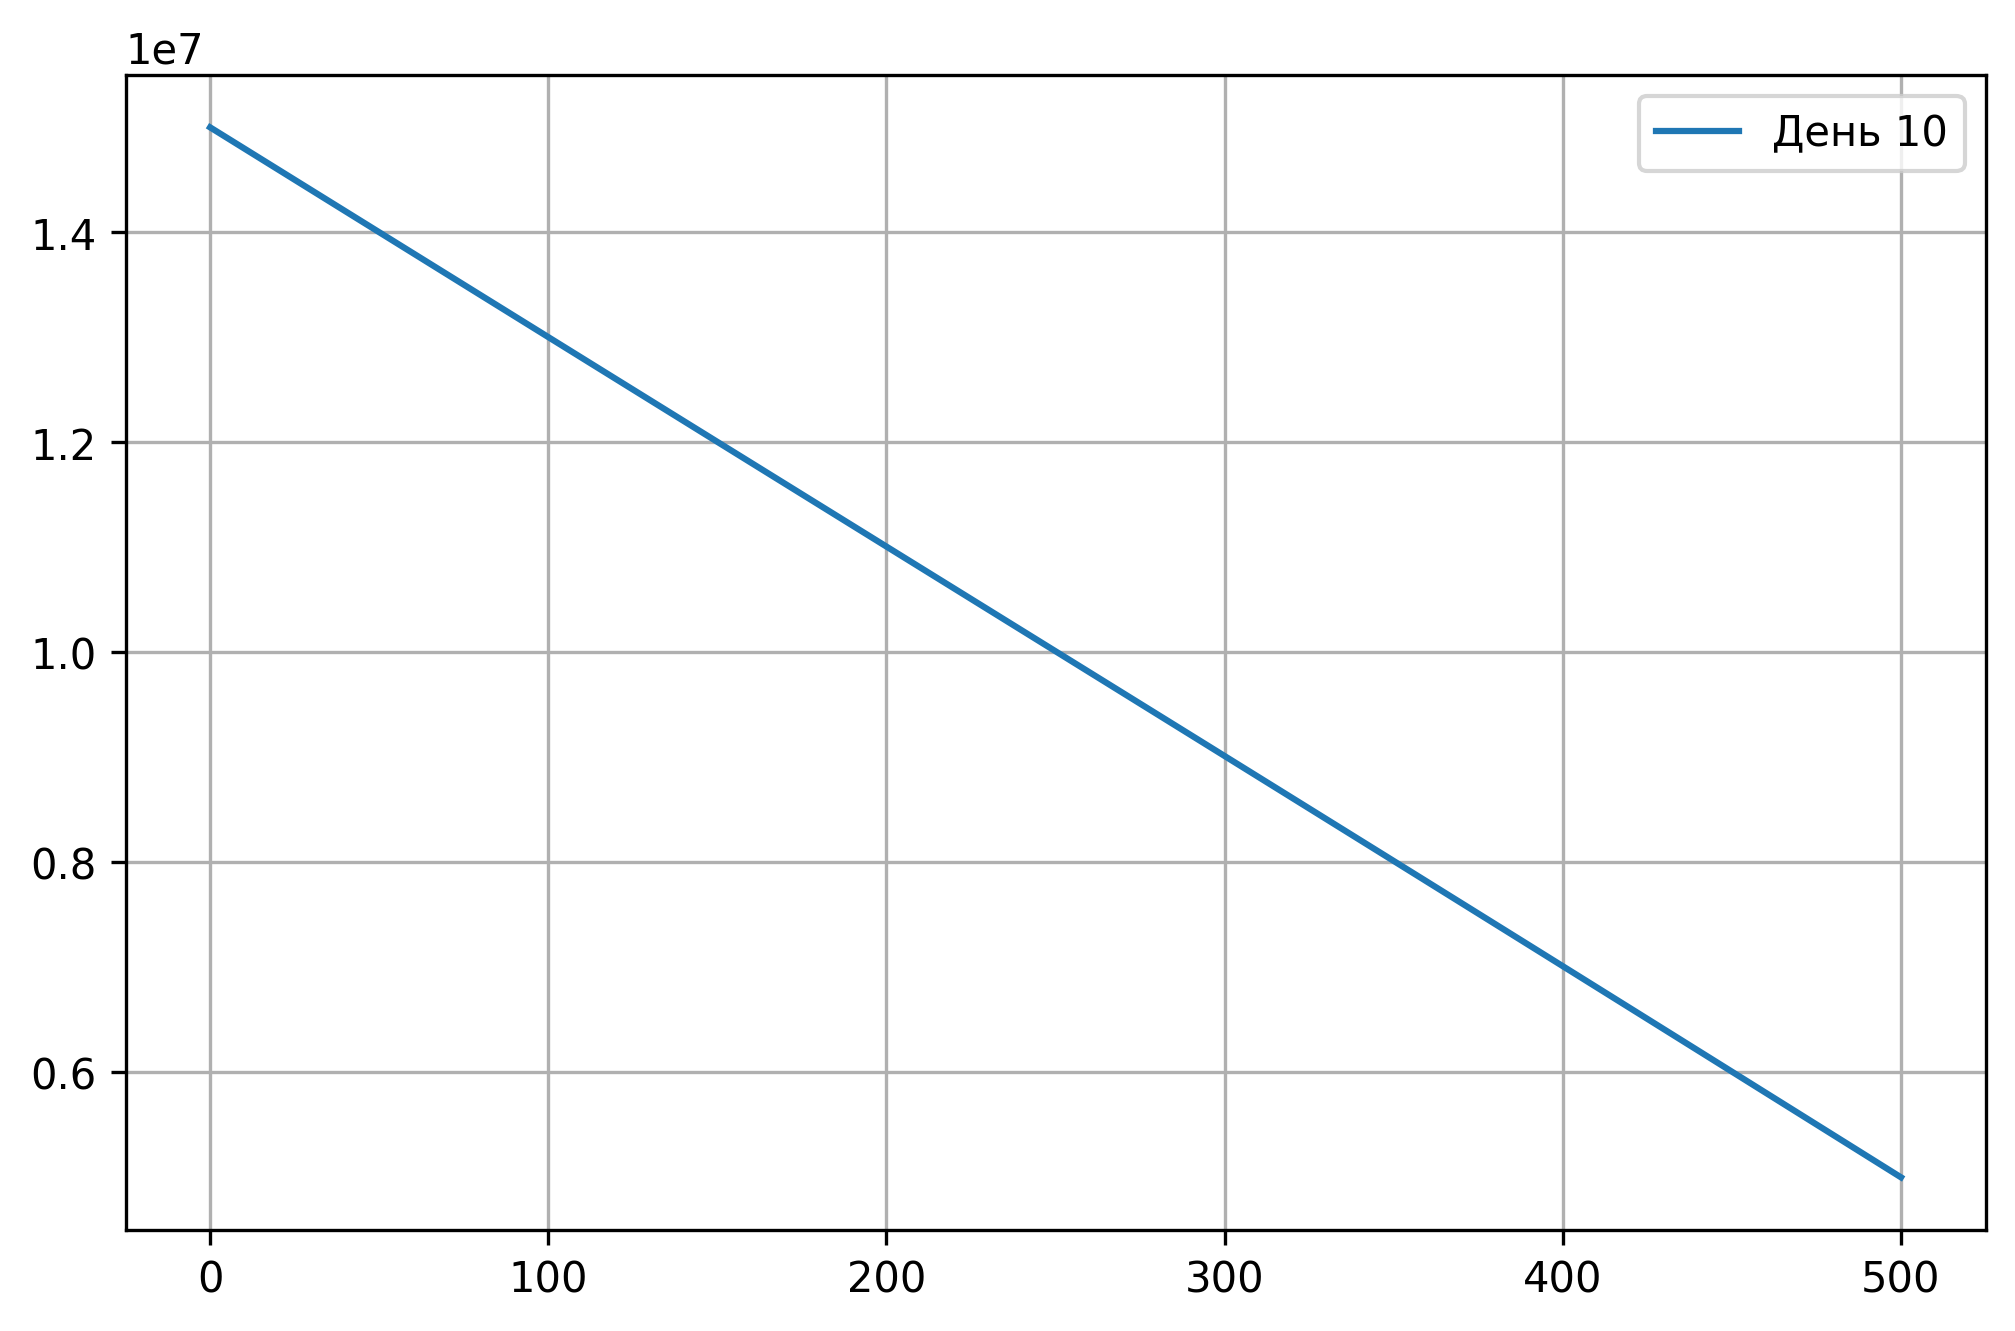

In [8]:
Graph()